In [1]:
from DQN import DQN
from datetime import datetime
import matplotlib.pyplot as plt
import gym
from gym import wrappers
import numpy as np
from time import time

In [2]:
env = gym.make('CartPole-v0')
#env = gym.make('LunarLander-v2')

In [3]:
filename = "DQN"
dqn = DQN(env=env, weight_file=filename,
    epsilon=1, epsilon_decay=0.99, epsilon_cutoff=0.05, 
    alpha=0.001, gamma=0.99, numEpisodes=501,
    memorySize=10000, startMemSize=500,
    stepSize=100, batchSize=32)
dqn.createANNModel((16, 16))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
*********** no weights loaded ***********
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________


In [4]:
print("\n*****Start time: ", datetime.now().time())
dqn.trainDQN(10)
print("\n*****Finish time: ", datetime.now().time())


*****Start time:  14:39:24.195075

episode 10: loss-->0.19+/-0.10, reward-->22.22+/-7.22

episode 20: loss-->0.72+/-0.22, reward-->17.00+/-4.45

episode 30: loss-->0.59+/-0.40, reward-->14.33+/-4.47

episode 40: loss-->0.79+/-0.62, reward-->13.56+/-4.14

episode 50: loss-->0.87+/-0.45, reward-->19.44+/-9.53

episode 60: loss-->0.76+/-0.54, reward-->31.44+/-38.61

episode 70: loss-->1.26+/-1.09, reward-->73.22+/-23.71

episode 80: loss-->3.73+/-3.24, reward-->68.44+/-28.74

episode 90: loss-->2.73+/-2.66, reward-->105.89+/-45.75

episode 100: loss-->4.73+/-4.13, reward-->157.78+/-39.41

*****Finish time:  14:41:18.304246


Text(0, 0.5, 'training error')

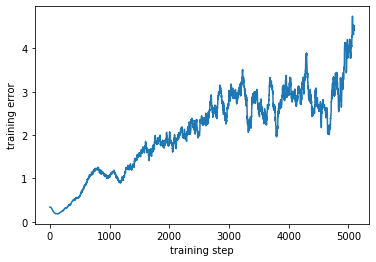

In [5]:
losses = dqn.training_losses
loss_ave = []
loss_std = []
for i in range(len(losses)-10):
  loss_ave.append(np.average(losses[i: i+10]))
  loss_std.append(np.std(losses[i: i+100]))
plt.plot(loss_ave)
plt.xlabel("training step")
plt.ylabel("training error")

Text(0, 0.5, 'reward')

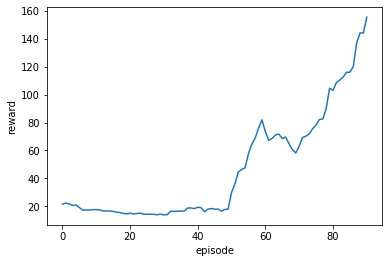

In [6]:
rewards = dqn.training_rewards
reward_ave = []
reward_std = []
for i in range(len(rewards)-10):
  reward_ave.append(np.average(rewards[i: i+10]))
plt.plot(reward_ave)
plt.xlabel("episode")
plt.ylabel("reward")

In [7]:
env = wrappers.Monitor(env, './videos/' + str(time()) + '/')
dqn.env = env
dqn.runOneEpisode(0, render=True, train=False)

200.0

In [8]:
env.close()